# Formula 1 Race Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Roadmap
#### 1. Data Structure Overview
#### 2. Exploratory Data Analysis
#### 3. Predict top 3, 6, 10 finish by categorical models
#### 4. Predict head-to-head result
#### 5. Predict finishing order based on head-to-head result
#### 6. Probability of an event
#### 7. Evaluation & Conclusion

## 1. Data Structure Overview
import dataframes

In [2]:
circuits = pd.read_csv('data/circuits.csv')
c_results = pd.read_csv('data/constructor_results.csv')
c_standings = pd.read_csv('data/constructor_standings.csv')
c = pd.read_csv('data/constructors.csv')
d_standings = pd.read_csv('data/driver_standings.csv')
d = pd.read_csv('data/drivers.csv')
lap = pd.read_csv('data/lap_times.csv')
pit = pd.read_csv('data/pit_stops.csv')
quali = pd.read_csv('data/qualifying.csv')
race = pd.read_csv('data/races.csv')
results = pd.read_csv('data/results.csv')
seasons = pd.read_csv('data/seasons.csv')
sprint = pd.read_csv('data/sprint_results.csv')
status = pd.read_csv('data/status.csv')

Check out dataframe structure. Note that the leftmost column is a meaningless index column

In [3]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
d.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
c_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


Driver standings include the points and standing of each driver after each race

In [6]:
d_standings.iloc[100:105]

,driverStandingsId,raceId,driverId,points,position,positionText,wins
100,101,23,17,15.0,7,7,0
101,102,23,14,0.0,16,16,0
102,103,23,18,3.0,13,13,0
103,104,23,12,0.0,19,19,0
104,105,23,21,0.0,18,18,0


In [7]:
lap.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


Pit time is the total time in the box and through the pitlane

In [8]:
pit.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [9]:
quali.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


Races are NOT sorted by chronological order in the original dataframe

In [10]:
race.sort_values('year').head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
838,839,1950,7,14,Italian Grand Prix,1950-09-03,\N,http://en.wikipedia.org/wiki/1950_Italian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
837,838,1950,6,55,French Grand Prix,1950-07-02,\N,http://en.wikipedia.org/wiki/1950_French_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [11]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [12]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


Merge results and race to get date and circuit for each race. The time column in race is dropped because it conflicts with the total race time in results.

In [13]:
raceresults = pd.merge(race.drop('time', axis = 1), results, how = 'inner', on = 'raceId')[['year', 'round', 'circuitId']+list(results.columns)].sort_values(['year', 'round', 'positionOrder'], ascending = True)
raceresults.head()

,year,round,circuitId,resultId,raceId,driverId,constructorId,number,grid,position,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20619,1950,1,9,20025,833,642,51,2,1,1,...,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N,1
20620,1950,1,9,20026,833,786,51,3,2,2,...,2,6.0,70,+2.6,8006200,\N,\N,\N,\N,1
20621,1950,1,9,20027,833,686,51,4,4,3,...,3,4.0,70,+52.0,8055600,\N,\N,\N,\N,1
20622,1950,1,9,20028,833,704,154,14,6,4,...,4,3.0,68,\N,\N,\N,\N,\N,\N,12
20623,1950,1,9,20029,833,627,154,15,9,5,...,5,2.0,68,\N,\N,\N,\N,\N,\N,12


Get championship results of each year. We find it by determining the last race (max round) of each year from raceresults dataframe and match it in the d_standings dataframe.

In [14]:
max_round = raceresults.groupby('year')['round'].max().reset_index()
max_round.head()

,year,round
0,1950,7
1,1951,8
2,1952,8
3,1953,9
4,1954,9


In [15]:
last_race = max_round.merge(race, how = 'left', on = ['year', 'round'])[['year', 'raceId']]
last_race.head()

,year,raceId
0,1950,839
1,1951,832
2,1952,824
3,1953,816
4,1954,807


In [16]:
final_standings = last_race.merge(d_standings.sort_values('position'), how = 'left', on = 'raceId').drop(['raceId', 'driverStandingsId'], axis = 1)
final_standings.merge(d[['driverId', 'surname']], how = 'left', on = 'driverId').head()

,year,driverId,points,position,positionText,wins,surname
0,1950,642,30.0,1,1,3,Farina
1,1950,579,27.0,2,2,3,Fangio
2,1950,786,24.0,3,3,0,Fagioli
3,1950,627,13.0,4,4,0,Rosier
4,1950,647,11.0,5,5,0,Ascari


In [17]:
final_c_standings = last_race.merge(c_standings.sort_values('position'), how = 'left', on = 'raceId').drop(['raceId', 'constructorStandingsId'], axis = 1)
# No constructor standings before 1958
final_c_standings = final_c_standings[final_c_standings['year'] >= 1958]
final_c_standings.merge(c[['constructorId', 'name']], how = 'left', on = 'constructorId').head()

,year,constructorId,points,position,positionText,wins,name
0,1958,118.0,48.0,1.0,1,6.0,Vanwall
1,1958,6.0,40.0,2.0,2,2.0,Ferrari
2,1958,87.0,31.0,3.0,3,2.0,Cooper
3,1958,66.0,18.0,4.0,4,0.0,BRM
4,1958,105.0,6.0,5.0,5,0.0,Maserati


The status dataframe matches statusId with race-finishing status. However, there are overlaps. We shall only use it attentively.
All collisions/accidents are marked as driver errors. All mechanical failures are marked as constructor errors.

In [18]:
status.head()

,statusId,status,type
0,1,Finished,o
1,2,Disqualified,o
2,3,Accident,d
3,4,Collision,d
4,5,Engine,c


## 2. Exploratory Data Analysis

In [19]:
def merge_d_name(df):
    return df.merge(d[['driverId', 'surname']], how = 'left', on = 'driverId')

def merge_c_name(df):
    return df.merge(c[['constructorId', 'name']], how = 'left', on = 'constructorId')

Number of drivers each year

Text(0, 0.5, 'Number of Drivers')

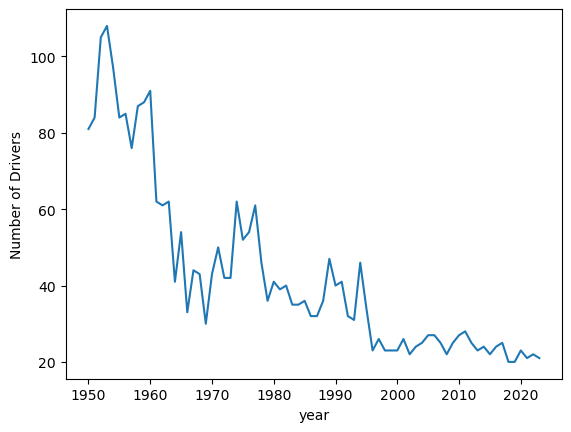

In [20]:
driver_num = final_standings.groupby('year')['driverId'].count().reset_index()
sns.lineplot(x = 'year', y = 'driverId', data = driver_num)
plt.ylabel('Number of Drivers')

Most race wins

In [21]:
total_wins_by_Id = results[results['positionOrder'] == 1].groupby('driverId')['resultId'].count().sort_values(ascending = False).reset_index().rename({'resultId' : 'total_wins'}, axis = 1)

In [22]:
total_wins_by_driver = merge_d_name(total_wins_by_Id)
total_wins_by_driver.head(10)

,driverId,total_wins,surname
0,1,103,Hamilton
1,30,91,Schumacher
2,20,53,Vettel
3,117,51,Prost
4,830,45,Verstappen
5,102,41,Senna
6,4,32,Alonso
7,95,31,Mansell
8,328,27,Stewart
9,182,25,Lauda


Most championship wins

In [23]:
total_wdc_by_Id = final_standings[final_standings['position'] == 1].groupby('driverId')['wins'].count().sort_values(ascending = False).reset_index()

In [24]:
total_wdc_by_driver = merge_d_name(total_wins_by_Id)
total_wdc_by_driver.head()

,driverId,total_wins,surname
0,1,103,Hamilton
1,30,91,Schumacher
2,20,53,Vettel
3,117,51,Prost
4,830,45,Verstappen


Total races entered by driver

In [25]:
total_races_driver = results.groupby('driverId')['raceId'].count().sort_values(ascending = False).reset_index().rename({'raceId' : 'total_races'}, axis = 1)
total_races_driver = merge_d_name(total_races_driver)
total_races_driver.head()

,driverId,total_races,surname
0,4,370,Alonso
1,8,352,Räikkönen
2,22,326,Barrichello
3,1,322,Hamilton
4,18,309,Button


Total races entered by constructor

<Axes: xlabel='name', ylabel='total_races'>

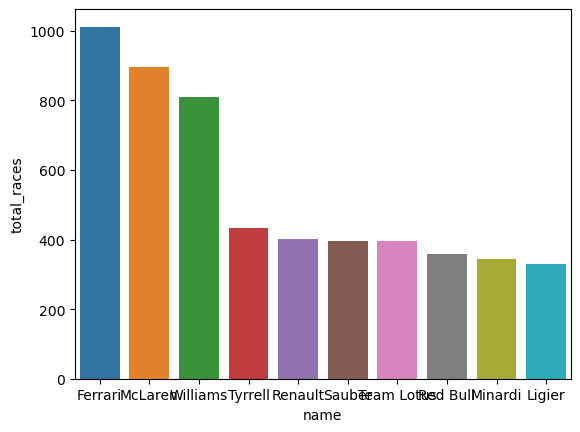

In [26]:
total_races_constructor = c_results.groupby('constructorId')['raceId'].count().reset_index().rename({'raceId' : 'total_races'}, axis = 1).sort_values('total_races', ascending = False)
total_races_constructor = merge_c_name(total_races_constructor)
sns.barplot(x = 'name', y = 'total_races', data = total_races_constructor.head(10))

Pole-to-win ratio (for drivers with more than 5 poles)

In [27]:
polesitters = quali[quali['position'] == 1][['raceId', 'driverId']]
# Select drivers with more than 5 poles
total_poles = polesitters.groupby('driverId')['raceId'].count().reset_index().rename({'raceId' : 'total_poles'}, axis = 1)
total_poles = total_poles[total_poles['total_poles'] > 5]
polesitters = polesitters[polesitters['driverId'].isin(total_poles['driverId'])]
winners = results[results['positionOrder'] == 1][['raceId', 'driverId']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Verstappen'),
  Text(1, 0, 'Schumacher'),
  Text(2, 0, 'Button'),
  Text(3, 0, 'Alonso'),
  Text(4, 0, 'Hamilton'),
  Text(5, 0, 'Villeneuve'),
  Text(6, 0, 'Vettel'),
  Text(7, 0, 'Rosberg'),
  Text(8, 0, 'Massa'),
  Text(9, 0, 'Barrichello'),
  Text(10, 0, 'Häkkinen'),
  Text(11, 0, 'Hill'),
  Text(12, 0, 'Räikkönen'),
  Text(13, 0, 'Bottas'),
  Text(14, 0, 'Webber'),
  Text(15, 0, 'Leclerc'),
  Text(16, 0, 'Coulthard')])

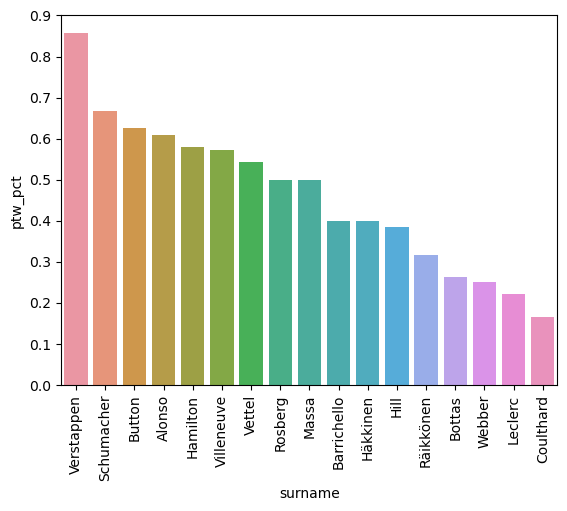

In [28]:
ptw = polesitters.merge(winners, how = 'left', on = 'raceId').rename({'driverId_x' : 'pole', 'driverId_y' : 'winner'}, axis = 1)
ptw['ptw'] = ptw['pole'] == ptw['winner']
ptw = ptw.groupby('pole')['ptw'].mean().sort_values(ascending = False).reset_index().rename({'pole' : 'driverId', 'ptw' : 'ptw_pct'}, axis = 1)
ptw = merge_d_name(ptw)
sns.barplot(x = 'surname', y = 'ptw_pct', data = ptw)
plt.xticks(rotation=90)

Most front row lock-outs

In [29]:
P1c = quali[quali['position'] == 1][['raceId', 'constructorId']]
P2c = quali[quali['position'] == 2][['raceId', 'constructorId']]
front_row = P1c.merge(P2c, on = 'raceId').rename({'constructorId_x' : 'P1c', 'constructorId_y' : 'P2c'}, axis = 1)
front_row['lockout'] = front_row['P1c'] == front_row['P2c']
front_row = front_row.rename({'P1c' : 'constructorId'}, axis = 1).groupby('constructorId')['lockout'].sum().sort_values(ascending = False).reset_index()
front_row = merge_c_name(front_row)
front_row.head()

,constructorId,lockout,name
0,131,83,Mercedes
1,6,31,Ferrari
2,9,25,Red Bull
3,1,22,McLaren
4,3,19,Williams


Reliability retirement probability of constructors (with more than 100 races).
Most reliable constructors are new constructors because old F1 cars are unreliable

In [30]:
resultstatus = results.merge(status, how = 'left', on = 'statusId')

In [31]:
c_resultstatus = resultstatus[resultstatus['constructorId'].isin(
    total_races_constructor[total_races_constructor['total_races'] > 100]['constructorId'])]
c_resultstatus['team_error'] = c_resultstatus['type'] == 'c'
c_resultstatus.head()
team_retirement = c_resultstatus.groupby('constructorId')['team_error'].mean().sort_values(ascending = True).reset_index()
team_retirement = merge_c_name(team_retirement)
team_retirement.head()

C:\Users\Gavin\AppData\Local\Temp\ipykernel_17672\375113486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_resultstatus['team_error'] = c_resultstatus['type'] == 'c'


,constructorId,team_error,name
0,131,0.071918,Mercedes
1,10,0.084906,Force India
2,9,0.111111,Red Bull
3,210,0.112179,Haas F1 Team
4,5,0.164179,Toro Rosso


Driver error retirement probability of drivers with more than 50 races

In [32]:
d_resultstatus = resultstatus[resultstatus['driverId'].isin(
    total_races_driver[total_races_driver['total_races'] > 50]['driverId'])]
d_resultstatus['driver_error'] = d_resultstatus['type'] == 'd'
driver_retirement = d_resultstatus.groupby('driverId')['driver_error'].mean().sort_values(ascending = True).reset_index()
driver_retirement = merge_d_name(driver_retirement)
driver_retirement.head()

C:\Users\Gavin\AppData\Local\Temp\ipykernel_17672\1949186413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_resultstatus['driver_error'] = d_resultstatus['type'] == 'd'


,driverId,driver_error,surname
0,579,0.017241,Fangio
1,219,0.018182,Jabouille
2,456,0.019608,Salvadori
3,364,0.022989,Gurney
4,373,0.027397,Clark


## 3. Prediction of top 3, 6, 10 finish

### 3.0 Select years

Historic Formula 1 cars and races differ from modern ones in reliability, aerodynamics, and race rules, so some outdated data should be dropped. The ground-effect era of Formula 1 ended in 1982. In 1983, cars are drastically different. Hence, we drop all data prior to 1983.

In [33]:
MIN_YEAR = 1983

In [34]:
df = raceresults.copy()
df = df[df['year'] >= MIN_YEAR]
df.head()

,year,round,circuitId,resultId,raceId,driverId,constructorId,number,grid,position,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
11131,1983,1,36,10656,452,137,34,5,4,1,...,1,9.0,63,1:48:27.731,6507731,\N,\N,\N,\N,1
11132,1983,1,36,10657,452,182,1,8,9,3,...,2,4.0,63,+51.883,6559614,\N,\N,\N,\N,1
11133,1983,1,36,10658,452,172,3,2,18,4,...,3,3.0,63,+1:13.951,6581682,\N,\N,\N,\N,1
11134,1983,1,36,10659,452,175,6,27,3,5,...,4,2.0,63,+1:18.117,6585848,\N,\N,\N,\N,1
11135,1983,1,36,10660,452,176,21,29,20,6,...,5,1.0,63,+1:18.207,6585938,\N,\N,\N,\N,1


### 3.1 Feature Engineering

Construct a new dataframe

In [35]:
df = df.drop('points', axis = 1).merge(d_standings.drop(['driverStandingsId', 'positionText'], axis = 1).rename(
    {'position' : 'standing'}, axis = 1), how = 'left', on = ['raceId', 'driverId'])
df = df.merge(c_standings[['raceId', 'constructorId', 'position']].rename({'position' : 'c_standing'}, axis = 1),
              how = 'left', on = ['raceId', 'constructorId'])
df.columns

Index(['year', 'round', 'circuitId', 'resultId', 'raceId', 'driverId',
       'constructorId', 'number', 'grid', 'position', 'positionText',
       'positionOrder', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'points', 'standing',
       'wins', 'c_standing'],
      dtype='object')

Drop all retirements

In [36]:
df = df[df.merge(status, how = 'left', on = 'statusId')['type'] == 'o']

Target variables: top3, top6, top10

In [37]:
df['top3'] = df['positionOrder'] <= 3
df['top6'] = (df['positionOrder'] <= 6) & (df['positionOrder'] > 3)
df['top10'] = (df['positionOrder'] <= 10) & (df['positionOrder'] > 6)

Add lagged variables

In [38]:
df['prev_standing'] = df.groupby('driverId')['standing'].transform(lambda x: x.shift(1))
df['prev_1race'] = df.groupby('driverId')['positionOrder'].transform(lambda x: x.shift(1))
df['prev_2race'] = df.groupby('driverId')['positionOrder'].transform(lambda x: x.shift(2))
df['prev_3race'] = df.groupby('driverId')['positionOrder'].transform(lambda x: x.shift(3))

Additional feature: whether a driver is currently top 3, 6, or 10 in driver's standings with one-hot encoding. top3stand, top6stand, top10stand. If first race of the year, take result from the last year. Set to all 0 for rookie drivers.

In [39]:
df['top3stand'] = df['prev_standing'] <= 3
df['top6stand'] = (df['prev_standing'] > 3) & (df['prev_standing'] <= 6)
df['top10stand'] = (df['prev_standing'] > 6) & (df['prev_standing'] <= 10)
df.head()

,year,round,circuitId,resultId,raceId,driverId,constructorId,number,grid,position,...,top3,top6,top10,prev_standing,prev_1race,prev_2race,prev_3race,top3stand,top6stand,top10stand
0,1983,1,36,10656,452,137,34,5,4,1,...,True,False,False,NaN,NaN,NaN,NaN,False,False,False
1,1983,1,36,10657,452,182,1,8,9,3,...,True,False,False,NaN,NaN,NaN,NaN,False,False,False
2,1983,1,36,10658,452,172,3,2,18,4,...,True,False,False,NaN,NaN,NaN,NaN,False,False,False
3,1983,1,36,10659,452,175,6,27,3,5,...,False,True,False,NaN,NaN,NaN,NaN,False,False,False
4,1983,1,36,10660,452,176,21,29,20,6,...,False,True,False,NaN,NaN,NaN,NaN,False,False,False


Additional feature: whether a constructor is currently top 1, 3, or 5 in constructor's standings. top1cstand, top3cstand, top5cstand. If first race of the year, take result from the last year. Set to all 0 for new constructors.

In [40]:
df['top1cstand'] = df['c_standing'] == 1
df['top3cstand'] = (df['c_standing'] > 1) & (df['c_standing'] <= 3)
df['top5cstand'] = (df['c_standing'] > 3) & (df['c_standing'] <= 5)

Other 16 features: (average finishing position, percentage of top 3, 6, 10 finishes) * (last year, this year) * (driver, constructors)

Average finishing position of driver in their last season

In [41]:
# Average finishing position of the current year
avg_year = df.groupby(['driverId', 'year'])['positionOrder'].mean().reset_index()
avg_year['avg_prev_d'] = avg_year.groupby('driverId')['positionOrder'].transform(lambda x: x.shift(1))
# Drop column to prevent data leakage
df = df.merge(avg_year.drop('positionOrder', axis = 1), how = 'left', on = ['driverId', 'year'])

Average finishing position of driver in the current season up to the current race

In [42]:
df['avg_curr_d'] = df.groupby(['driverId', 'year'])['positionOrder'].transform(lambda x: (x.cumsum()/np.arange(1, len(x)+1)).shift(1))

Average finishing position of constructor (average among two drivers) in their last season

In [43]:
# Average finishing position of the current year
c_avg_year = df.groupby(['constructorId', 'year'])['positionOrder'].mean().reset_index()
c_avg_year['avg_prev_c'] = c_avg_year.groupby('constructorId')['positionOrder'].transform(lambda x: x.shift(1))
df = df.merge(c_avg_year.drop('positionOrder', axis = 1), how = 'left', on = ['constructorId', 'year'])

Average finishing position of constructor in the current season up to the current race

In [44]:
constructor_raceres = df.groupby(['constructorId', 'year', 'round'])['positionOrder'].mean().reset_index()
constructor_raceres['avg_curr_c'] = constructor_raceres.groupby(['constructorId', 'year'])['positionOrder'].transform(
    lambda x: (x.cumsum()/np.arange(1, len(x)+1)).shift(1))
df = df.merge(constructor_raceres.drop('positionOrder', axis = 1), how = 'left', on = ['constructorId', 'year', 'round'])

Percentage of drivers' top 3, 6, 10 finishes past year

In [45]:
top3pct_prev_d = df.groupby(['driverId', 'year'])[['top3', 'top6', 'top10']].mean().reset_index()
top3pct_prev_d[['top3pct_prev_d', 'top6pct_prev_d', 'top10pct_prev_d']] = top3pct_prev_d.groupby(
    'driverId')[['top3', 'top6', 'top10']].transform(lambda x: x.shift(1))
df = df.merge(top3pct_prev_d.drop(['top3', 'top6', 'top10'], axis = 1), how = 'left', on = ['driverId', 'year'])

Percentage of drivers' top 3, 6, 10 finishes in the current season up to the current race

In [46]:
df[['top3pct_curr_d', 'top6pct_curr_d', 'top10pct_curr_d']] = df.groupby(['driverId', 'year'])[['top3', 'top6', 'top10']].transform(lambda x: (x.cumsum()/np.arange(1, len(x)+1)).shift(1))

Percentage of constructors' top 1, 3, 5 finishes are strongly correlated with drivers' finishes. Hence omitted.

In [47]:
df.columns

Index(['year', 'round', 'circuitId', 'resultId', 'raceId', 'driverId',
       'constructorId', 'number', 'grid', 'position', 'positionText',
       'positionOrder', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'points', 'standing',
       'wins', 'c_standing', 'top3', 'top6', 'top10', 'prev_standing',
       'prev_1race', 'prev_2race', 'prev_3race', 'top3stand', 'top6stand',
       'top10stand', 'top1cstand', 'top3cstand', 'top5cstand', 'avg_prev_d',
       'avg_curr_d', 'avg_prev_c', 'avg_curr_c', 'top3pct_prev_d',
       'top6pct_prev_d', 'top10pct_prev_d', 'top3pct_curr_d', 'top6pct_curr_d',
       'top10pct_curr_d'],
      dtype='object')

Check correlation matrix

In [55]:
df_features = pd.DataFrame(index = df['resultId'], data = df[['top3', 'top6', 'top10', 'prev_standing', 'prev_1race',
       'prev_2race', 'prev_3race', 'top3stand', 'top6stand', 'top10stand',
       'top1cstand', 'top3cstand', 'top5cstand', 'avg_prev_d', 'avg_curr_d',
       'avg_prev_c', 'avg_curr_c', 'top3pct_prev_d', 'top6pct_prev_d',
       'top10pct_prev_d', 'top3pct_curr_d', 'top6pct_curr_d',
       'top10pct_curr_d']])

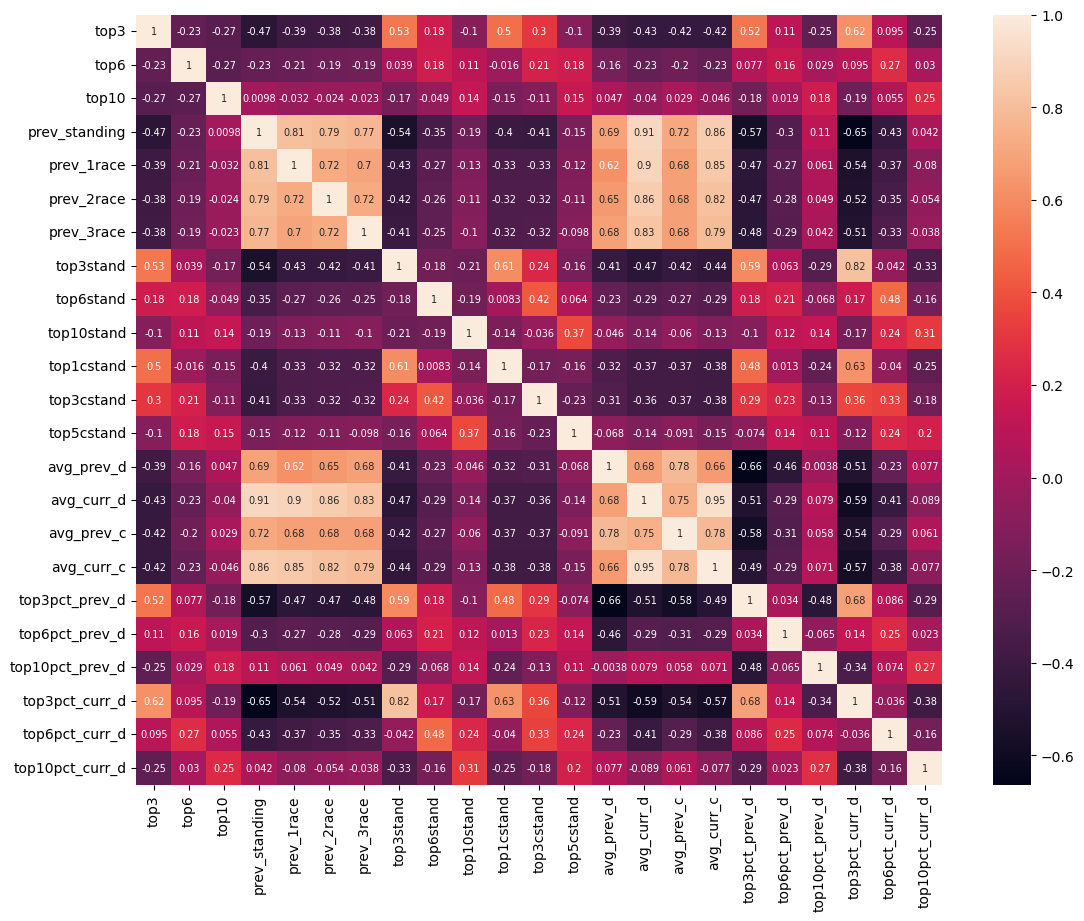

In [49]:
plt.figure(figsize=(13,10))
sns.heatmap(df_features.corr(), annot=True, mask = False, annot_kws={"size": 7})
plt.show()

### 3.2 One-Hot Encoding for circuit, driver, and constructor

Accounts for the intrinsic variations in circuit, driver, and constructor characteristics

In [57]:
encoded = pd.get_dummies(pd.DataFrame(index = df['resultId'], data = df[['circuitId', 'driverId', 'constructorId']]),
                         columns=['circuitId', 'driverId', 'constructorId'])

,circuitId_1.0,circuitId_2.0,circuitId_3.0,circuitId_4.0,circuitId_5.0,circuitId_6.0,circuitId_7.0,circuitId_8.0,circuitId_9.0,circuitId_10.0,...,constructorId_166.0,constructorId_205.0,constructorId_206.0,constructorId_207.0,constructorId_208.0,constructorId_209.0,constructorId_210.0,constructorId_211.0,constructorId_213.0,constructorId_214.0
resultId,,,,,,,,,,,,,,,,,,,,,
10656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Build final DataFrame for model

In [58]:
df_final = df_features.merge(encoded, left_index=True, right_index=True)
df_final.head()

,top3,top6,top10,prev_standing,prev_1race,prev_2race,prev_3race,top3stand,top6stand,top10stand,...,constructorId_166.0,constructorId_205.0,constructorId_206.0,constructorId_207.0,constructorId_208.0,constructorId_209.0,constructorId_210.0,constructorId_211.0,constructorId_213.0,constructorId_214.0
resultId,,,,,,,,,,,,,,,,,,,,,
10656,False,True,False,13.0,14.0,12.0,9.0,False,False,False,...,0,0,0,0,0,0,0,0,0,0
10657,False,False,True,7.0,6.0,6.0,7.0,False,False,True,...,0,0,0,0,0,0,0,0,0,0
10658,False,False,True,6.0,5.0,5.0,4.0,False,True,False,...,0,0,0,0,0,0,0,0,0,0
10659,False,False,True,5.0,10.0,10.0,8.0,False,True,False,...,0,0,0,0,0,0,0,0,0,0
10660,False,False,True,12.0,11.0,7.0,10.0,False,False,False,...,0,0,0,0,0,0,0,0,0,0


### 3.3 Model Training and Prediction

In [51]:
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, ConfusionMatrixDisplay  # Import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc